In [2]:
# 评分方差
import numpy as np
import pandas as pd

df_movie=pd.read_csv("data/movie_comments.csv",dtype={"score":np.float64,"content":str})
df_cele=pd.read_csv("data/cele_comments.csv",dtype={"score":str,"content":str})

group_id_movie=df_movie.groupby("work_id")
group_id_cele=df_cele.groupby("work_id")

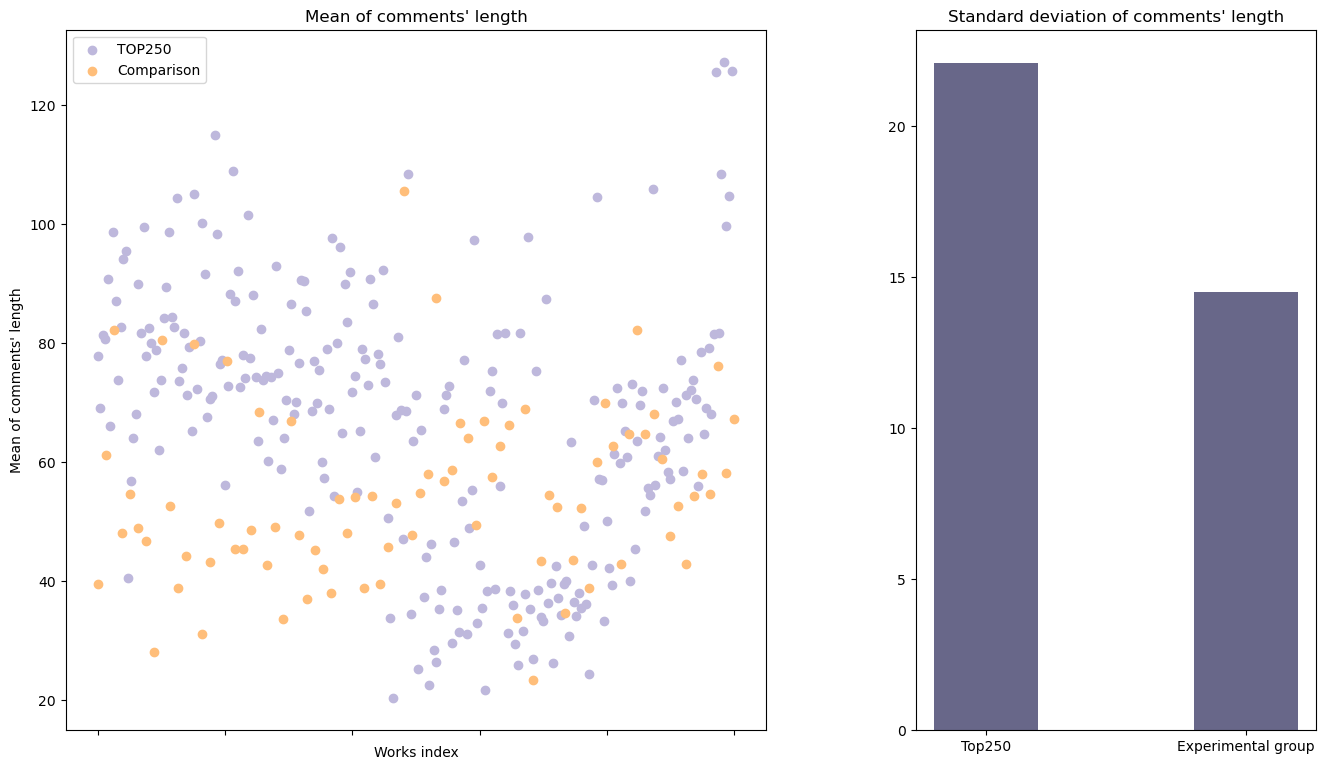

In [10]:
import matplotlib.pyplot as plt
mean_commentlen_movie=[
    np.mean(list(map(lambda x:len(str(x)),i[1]["content"]))) for i in group_id_movie
]	# top250每部电影短评的平均长度
mean_commentlen_cele=[
    np.mean(list(map(lambda x:len(str(x)),i[1]["content"]))) for i in group_id_cele
]	# 对照组每部作品短评的平均长度

fig=plt.figure(figsize=(10,7))

y=mean_commentlen_movie
x=range(len(y))
ax=fig.add_axes([0,0,0.7,1])
ax.scatter(x,y,color="#BEB8DC")

y=mean_commentlen_cele
x=np.linspace(0,250,80)
ax.scatter(x,y,color="#FFBE7A")

ax.set_title("Mean of comments' length")
ax.set_xlabel("Works index")
ax.set_ylabel("Mean of comments' length")
ax.set_xticklabels([])
ax.legend(["TOP250","Comparison"])


variance=[np.std(mean_commentlen_movie),np.std(mean_commentlen_cele)]
ax=fig.add_axes([0.85,0,0.4,1])
ax.bar([0,1],variance,width=0.4,color="#686789")
ax.set_title("Standard deviation of comments' length")
ax.set_xticks([0,1],["Top250","Experimental group"])

plt.show()

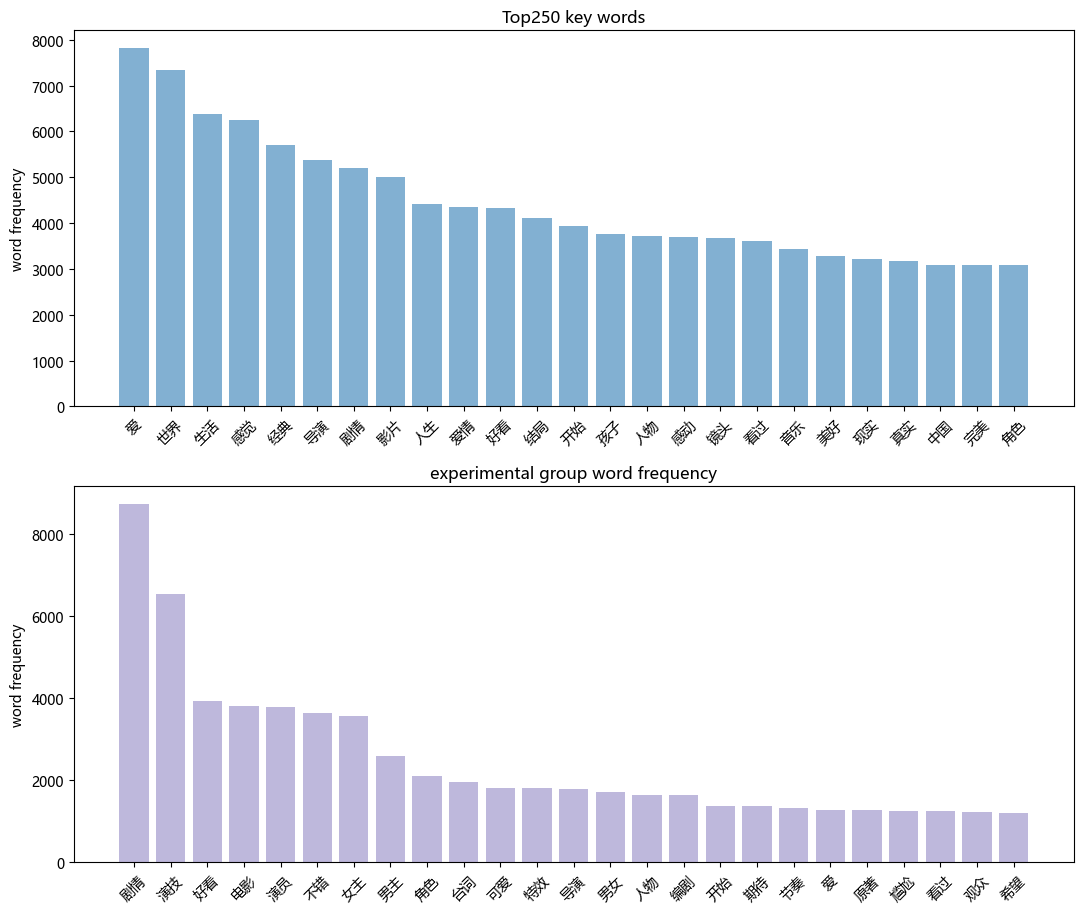

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


cele_word=pd.read_csv("data/cele_comments_wordscnt.csv")
movie_word=pd.read_csv("data/movie_comments_wordscnt.csv")

plt.rcParams['font.sans-serif']=['Microsoft Yahei']
fig=plt.figure(figsize=(10,8))

x=movie_word["words"][:25]
y=movie_word["times"][:25]
ax=fig.add_axes([0,0.57,1,0.47])
ax.bar(x,y,color="#82B0D2") 
ax.set_title("Top250 key words")
ax.set_ylabel("word frequency")
plt.xticks(rotation=45)

x=cele_word["words"][:25]
y=cele_word["times"][:25]
ax=fig.add_axes([0,0,1,0.47])
ax.bar(x,y,color='#BEB8DC')
ax.set_title("experimental group word frequency")
ax.set_ylabel("word frequency")
plt.xticks(rotation=45)

plt.show()

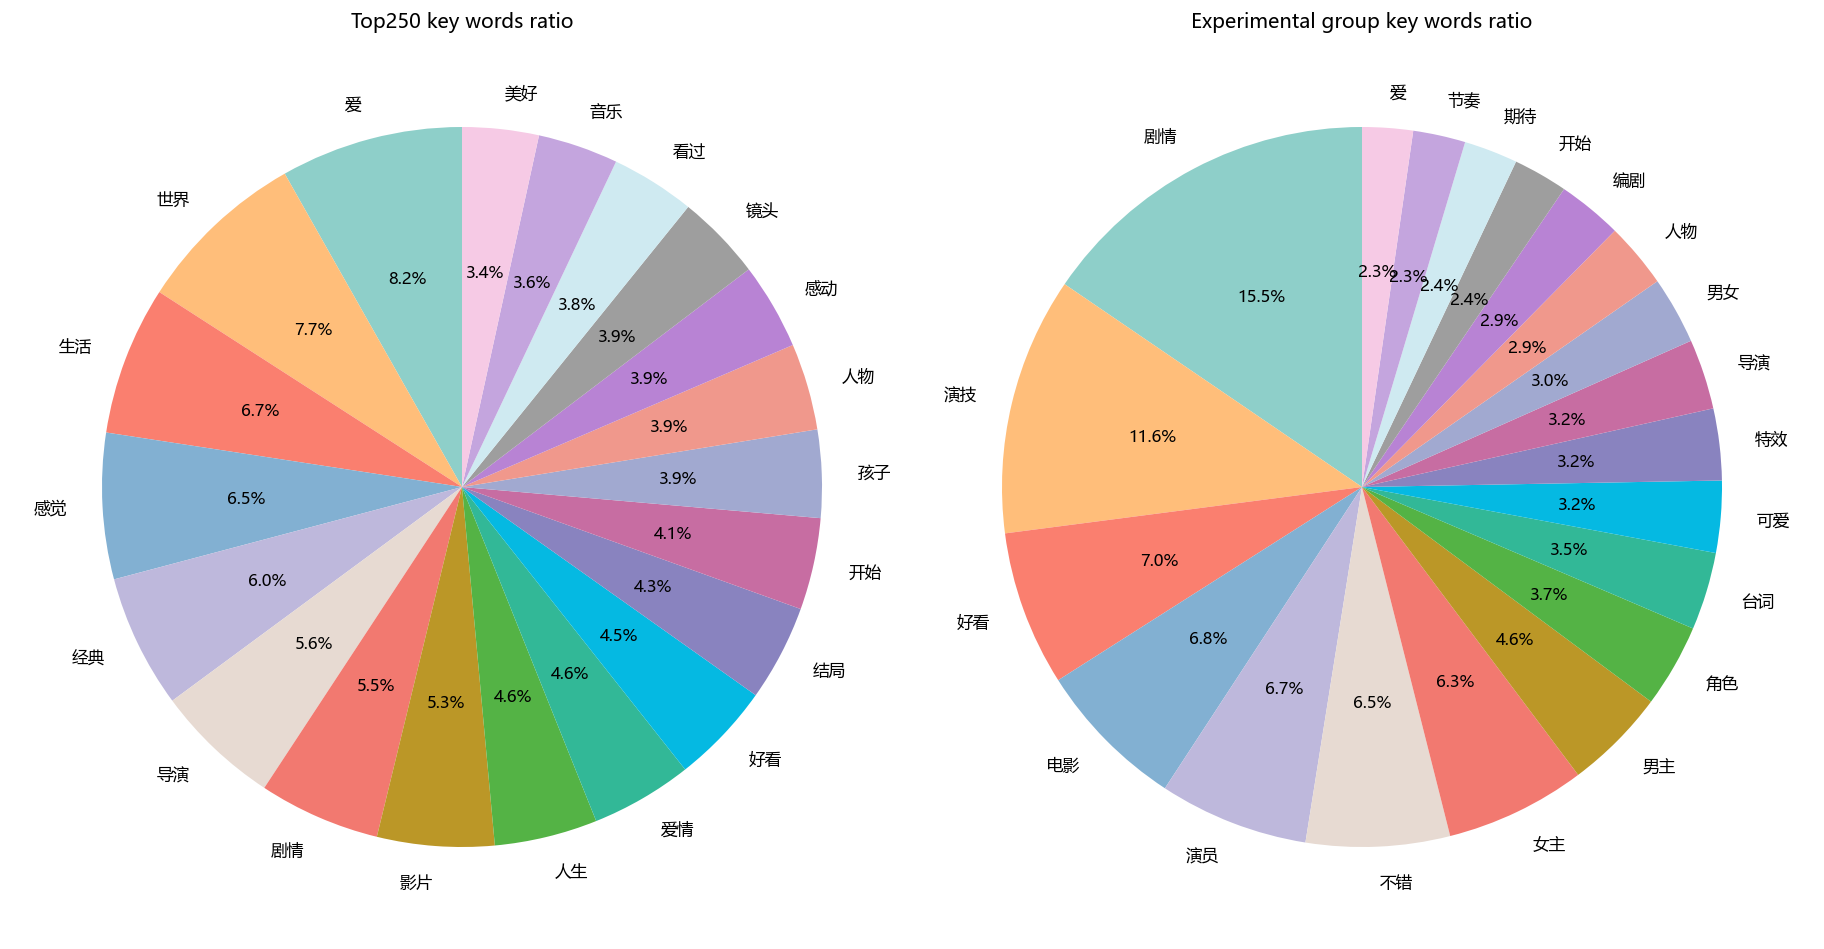

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

cele_word=pd.read_csv("data/cele_comments_wordscnt.csv")
movie_word=pd.read_csv("data/movie_comments_wordscnt.csv")

color_ls=[
	"#8ECFC9",
	"#FFBE7A",
	"#FA7F6F",
	"#82B0D2",
	"#BEB8DC",
	"#E7DAD2",
    "#F27970",
	"#BB9727",
	"#54B345",
	"#32B897",
	"#05B9E2",
	"#8983BF",
	"#C76DA2",
	"#A1A9D0",
	"#F0988C",
	"#B883D4",
	"#9E9E9E",
	"#CFEAF1",
	"#C4A5DE",
	"#F6CAE5",
	"#96CCCB",
	"#2878b5",
	"#9ac9db",
	"#f8ac8c",
	"#c82423",
	"#ff8884"
]

plt.rcParams['font.sans-serif']=['Microsoft Yahei']
fig=plt.figure(figsize=(15,10),dpi=120)

x=movie_word["words"][:20]
y=movie_word["times"][:20]
ax=fig.add_axes([0,0,0.5,1])
ax.pie(list(map(lambda k:k/np.sum(y),y)),labels=list(x),autopct='%1.1f%%',startangle=90,colors=color_ls)
ax.set_title("Top250 key words ratio")

x=cele_word["words"][:20]
y=cele_word["times"][:20]
ax=fig.add_axes([0.5,0,0.5,1])
ax.pie(list(map(lambda k:k/np.sum(y),y)),labels=list(x),autopct='%1.1f%%',startangle=90,colors=color_ls)
ax.set_title("Experimental group key words ratio")

plt.show()